# September

## Fatigueverhalten

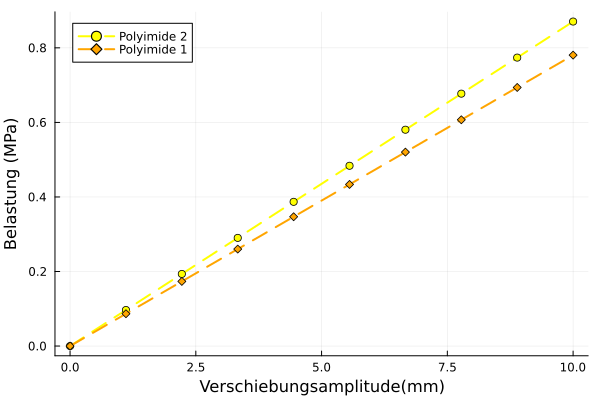

In [13]:

using SymPy
using Plots

Fig=plot()
Figzoom=plot()

# Fatigue-Test
####### Parylene ###########
## Setup Konfiguration
# Layer 3 Stahl
Es       = 200000 #Stahl
Sigma_Bs = 250 #MPa

ds=0.5 #mm
w=15 #mm
I=w*ds^3/12
l=70
deltamax=range(0,10,10) #mm


## Geometrie 
d1=0.010 #mm
d2=0.010 #mm
d3=0.5 #mm


## Mechaninische Eigenschaften
wp=10 #mm
# Layer 3 Silicon
E3=150000
Sigma_B3=170 #MPa

# Layer 2 Parylene
E2=3200
Sigma_B2=69 #MPa

# Layer 1 Parylene
E1=3200
Sigma_B1=69 #MPa

sigma1_max=[]
sigma2_max=[]
sigma3_max=[]
sigmas_max=[]
for i in deltamax

    ## Neutral axis berechnung

    ## Krafte und Torque
    F=i*48*Es*I/l^3
    M_max=(F/2)*l/2
    x_p=l/2
    M=(x_p/l)*M_max #N.mm


    c=symbols("c")
    eq=(1/2)*(w*Es*((ds-c)^2-(c)^2)+wp*E1*((ds-c+d1)^2-(ds-c)^2)+wp*E2*((ds-c+d1+d2)^2-(ds-c+d1)^2)+wp*E3*((ds-c+d1+d2+d3)^2-(ds-c+d1+d2)^2))

    sol=solve(eq,c)
    sol
    c=sol[]
    ## Belastung

    m=symbols("m")
    eqb=M-m*(1/3)*(w*Es*((ds-c)^3-(c)^3)+wp*E1*((ds-c+d1)^3-(ds-c)^3)+wp*E2*((ds-c+d1+d2)^3-(ds-c+d1)^3)+wp*E3*((ds-c+d1+d2+d3)^3-(ds-c+d1+d2)^3)+w*Es*((c)^3))
    solb=solve(eqb,m)
    solb
    m=solb[]

    ymax=(ds-c)+d1+d2+d3
    emax=ymax*m
    sigma3=m*(ds-c+d1+d2+d3)*E3
    sigma2=m*(ds-c+d1+d2)*E2
    sigma1=m*(ds-c+d1)*E1
    sigmas=m*(c)*Es


    push!(sigma3_max,sigma3)
    push!(sigma2_max,sigma2)
    push!(sigma1_max,sigma1)
    push!(sigmas_max,sigmas)

end

plot!(Fig,deltamax, sigma3_max, label="Si", lw=2, linestyle=:dash, color=:black, marker=:square);
plot!(Fig,deltamax, sigma2_max, label="Parylene 2", lw=2, linestyle=:dash, color=:yellow, marker=:circle);
plot!(Fig,deltamax, sigma1_max, label="Parylene 1", lw=2, linestyle=:dash, color=:orange, marker=:diamond);
plot!(Fig,deltamax, sigmas_max, label="Stahl", xlabel="Verschiebungsamplitude(mm)", ylabel="Belastung (MPa)", lw=2, linestyle=:dash, color=:gray, marker=:circle);

plot!(Figzoom,deltamax, sigma2_max, label="Parylene 2", lw=2, linestyle=:dash, color=:yellow, marker=:circle);
plot!(Figzoom,deltamax, sigma1_max, label="Parylene 1", xlabel="Verschiebungsamplitude(mm)", ylabel="Belastung (MPa)", lw=2, linestyle=:dash, color=:orange, marker=:diamond);


####### Polyimide ###########

Fig2=plot()
Figzoom2=plot()


## Setup Konfiguration
# Layer 3 Stahl
Es       = 200000 #Stahl
Sigma_Bs = 250 #MPa

ds=0.5 #mm
w=15 #mm
I=w*ds^3/12
l=70
deltamax=range(0,10,10) #mm


## Geometrie 
d1=0.010 #mm
d2=0.010 #mm
d3=0.5 #mm


## Mechaninische Eigenschaften
wp=10 #mm
# Layer 3 Silicon
E3=150000
Sigma_B3=170 #MPa

# Layer 2 Polyimid
E2=2500
Sigma_B2=69 #MPa

# Layer 1 Parylene
E1=2500
Sigma_B1=69 #MPa

sigma1_max=[]
sigma2_max=[]
sigma3_max=[]
sigmas_max=[]
for i in deltamax

    ## Neutral axis berechnung

    ## Krafte und Torque
    F=i*48*Es*I/l^3
    M_max=(F/2)*l/2
    x_p=l/2
    M=(x_p/l)*M_max #N.mm


    c=symbols("c")
    eq=(1/2)*(w*Es*((ds-c)^2-(c)^2)+wp*E1*((ds-c+d1)^2-(ds-c)^2)+wp*E2*((ds-c+d1+d2)^2-(ds-c+d1)^2)+wp*E3*((ds-c+d1+d2+d3)^2-(ds-c+d1+d2)^2))

    sol=solve(eq,c)
    sol
    c=sol[]
    ## Belastung

    m=symbols("m")
    eqb=M-m*(1/3)*(w*Es*((ds-c)^3-(c)^3)+wp*E1*((ds-c+d1)^3-(ds-c)^3)+wp*E2*((ds-c+d1+d2)^3-(ds-c+d1)^3)+wp*E3*((ds-c+d1+d2+d3)^3-(ds-c+d1+d2)^3)+w*Es*((c)^3))
    solb=solve(eqb,m)
    solb
    m=solb[]

    ymax=(ds-c)+d1+d2+d3
    emax=ymax*m
    sigma3=m*(ds-c+d1+d2+d3)*E3
    sigma2=m*(ds-c+d1+d2)*E2
    sigma1=m*(ds-c+d1)*E1
    sigmas=m*(c)*Es


    push!(sigma3_max,sigma3)
    push!(sigma2_max,sigma2)
    push!(sigma1_max,sigma1)
    push!(sigmas_max,sigmas)

end

plot!(Fig2,deltamax, sigma3_max, label="Si", lw=2, linestyle=:dash, color=:black, marker=:square);
plot!(Fig2,deltamax, sigma2_max, label="Polymide 2", lw=2, linestyle=:dash, color=:yellow, marker=:circle);
plot!(Fig2,deltamax, sigma1_max, label="Polyimide 1", lw=2, linestyle=:dash, color=:orange, marker=:diamond);
plot!(Fig2,deltamax, sigmas_max, label="Stahl", xlabel="Verschiebungsamplitude(mm)", ylabel="Belastung (MPa)", lw=2, linestyle=:dash, color=:gray, marker=:circle);

plot!(Figzoom2,deltamax, sigma2_max, label="Polyimide 2", lw=2, linestyle=:dash, color=:yellow, marker=:circle);
plot!(Figzoom2,deltamax, sigma1_max, label="Polyimide 1", xlabel="Verschiebungsamplitude(mm)", ylabel="Belastung (MPa)", lw=2, linestyle=:dash, color=:orange, marker=:diamond);




# Themal test

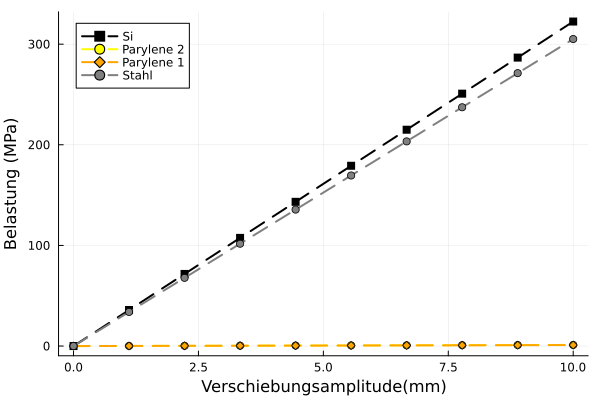

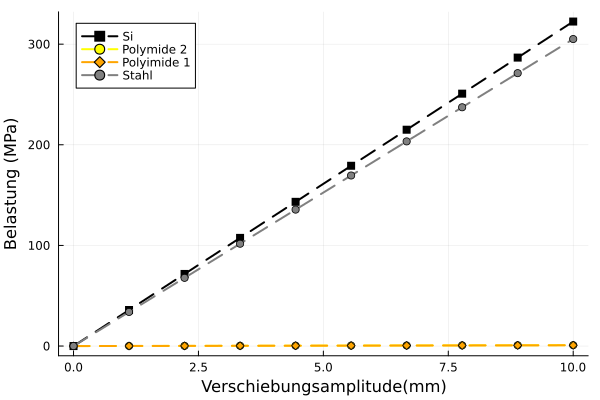

In [14]:
display(Fig)
display(Fig2)

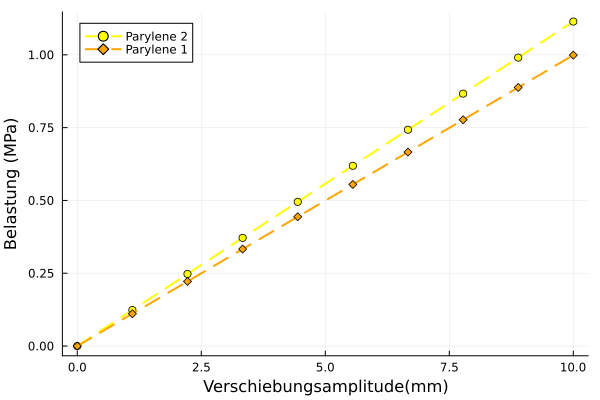

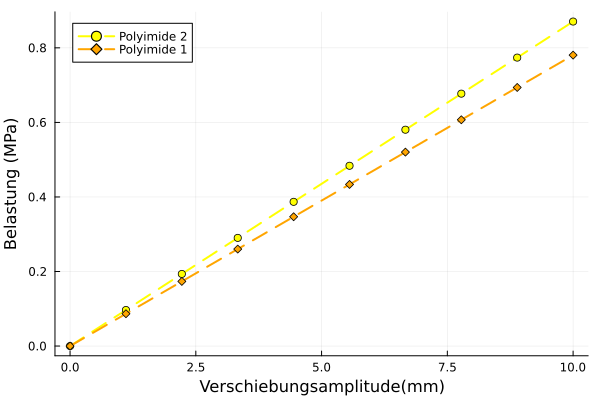

In [15]:
display(Figzoom)
display(Figzoom2)

## Thermal-Verhalten

### Parylene-Al

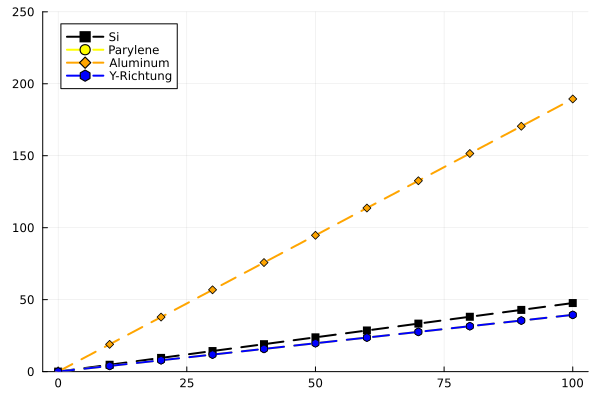

In [90]:
using SymPy
using Plots
using DataFrames
####### Thermalverhalten ##########

FigThermal=plot()


## Materials

#Parylene
Ep=2800
vp=0.4
alphap=35*10^(-6)
#Silicon
Esi=160000
vsi=0.253
alphasi=2.9*10^(-6)
#Aluminum
Eal=70000
val=0.33
alphaal=23.5*10^(-6)

## Equations

## Dehnung 
e1_1,e2_1,e3_1=symbols("e1_1 e2_1 e3_1")
e1_2,e2_2,e3_2=symbols("e1_2 e2_2 e3_2")
e1_3,e2_3,e3_3=symbols("e1_3 e2_3 e3_3")

## Spannung
o1_1,o2_1,o3_1=symbols("o1_1 o2_1 o3_1")
o1_2,o2_2,o3_2=symbols("o1_2 o2_2 o3_2")
o1_3,o2_3,o3_3=symbols("o1_3 o2_3 o3_3")


## Layers

v1,v2,v3=vsi,vp,val
E1,E2,E3=Esi,Ep,Eal
alpha1,alpha2,alpha3=alphasi,alphap,alphaal

## Geometrie

t1,t2,t3=0.5,0.01,0.04
l1,l2,l3=10,10,10
w1,w2,w3=5,5,5

## Load

deltaTRange=range(0,100,step=10) 


sigma1_max=[]
sigma2_max=[]
sigma3_max=[]
sigma_2=[]
for deltaT in deltaTRange
    #Constitutive law

    ## Richtung X
    eq1=e1_1-(1/E1)*(o1_1-v1*(o2_1-o3_1))-alpha1*deltaT
    eq2=e1_2-(1/E2)*(o1_2-v2*(o2_2-o3_2))-alpha2*deltaT
    eq3=e1_3-(1/E3)*(o1_3-v3*(o2_3-o3_3))-alpha3*deltaT

    ## Richtung Y
    eq4=e2_1-(1/E1)*(o2_1-v1*(o1_1-o3_1))-alpha1*deltaT
    eq5=e2_2-(1/E2)*(o2_2-v2*(o1_2-o3_2))-alpha2*deltaT
    eq6=e2_3-(1/E3)*(o2_3-v3*(o1_3-o3_3))-alpha3*deltaT


    ## Richtung Z
    eq7=e3_1-(1/E1)*(o3_1-v1*(o1_1-o2_1))-alpha1*deltaT
    eq8=e3_2-(1/E2)*(o3_2-v2*(o1_2-o2_2))-alpha2*deltaT
    eq9=e3_3-(1/E3)*(o3_3-v3*(o1_3-o2_3))-alpha3*deltaT


    #Kompatibilität

    ## Richtung X
    eq10=e1_1
    eq11=e1_2
    eq12=e1_3

    ## Richtung Y

    eq13=e2_1*t1+e2_2*t2+e2_3*t3
    eq14=o2_1-o2_2
    eq15=o2_2-o2_3

    ## Richtung Z

    eq16=e3_1
    eq17=e3_2
    eq18=e3_3

    ## solve
    sol=solve([eq1,eq2,eq3,
                eq4,eq5,eq6,
                eq7,eq8,eq9,
                eq10,eq11,eq12,
                eq13,eq14,eq15,
                eq16,eq17,eq18],
                [e1_1,e2_1,e3_1,
                e1_2, e2_2, e3_2,
                e1_3, e2_3, e3_3,
                o1_1, o2_1, o3_1,
                o1_2,o2_2,o3_2,
                o1_3,o2_3,o3_3])
    sol

    sigma1=minimum([sol[o1_1],sol[o2_1],sol[o3_1]]) # Layer 1
    sigma2=minimum([sol[o1_2],sol[o2_2],sol[o3_2]]) # Layer 2
    sigma3=minimum([sol[o1_3],sol[o2_3],sol[o3_3]]) # Layer 3

    push!(sigma1_max,abs(sigma1))
    push!(sigma2_max,abs(sigma2))
    push!(sigma3_max,abs(sigma3))
    push!(sigma_2,abs(sol[o2_1]))
end

sigma1_max

df_PaAl=DataFrame(o2=sigma_2,o_subs=sigma1_max,o_coat=sigma2_max,o_metal=sigma3_max)

plot!(FigThermal,deltaTRange,ylims=(0, 250), sigma1_max, label="Si", lw=2, linestyle=:dash, color=:black, marker=:square)
plot!(FigThermal,deltaTRange, ylims=(0, 250),sigma2_max, label="Parylene", lw=2, linestyle=:dash, color=:yellow, marker=:circle)
plot!(FigThermal,deltaTRange, ylims=(0, 250), sigma3_max, label="Aluminum", lw=2, linestyle=:dash, color=:orange, marker=:diamond)
plot!(FigThermal,deltaTRange,ylims=(0, 250),sigma_2, label="Y-Richtung", lw=2, linestyle=:dash, color=:blue, marker=:hexagon)



In [91]:
df_PaAl

Row,o2,o_subs,o_coat,o_metal
,Any,Any,Any,Any
1,0,0,0,0
2,3.94235559652222,4.76391672763827,3.94235559652222,18.9438589391369
3,7.88471119304445,9.52783345527654,7.88471119304445,37.8877178782738
4,11.8270667895667,14.2917501829148,11.8270667895667,56.8315768174108
5,15.7694223860889,19.0556669105531,15.7694223860889,75.7754357565477
6,19.7117779826111,23.8195836381914,19.7117779826111,94.7192946956846
7,23.6541335791333,28.5835003658296,23.6541335791333,113.663153634822
8,27.5964891756556,33.3474170934679,27.5964891756556,132.607012573958
9,31.5388447721778,38.1113338211062,31.5388447721778,151.550871513095


### Polyimide-Copper

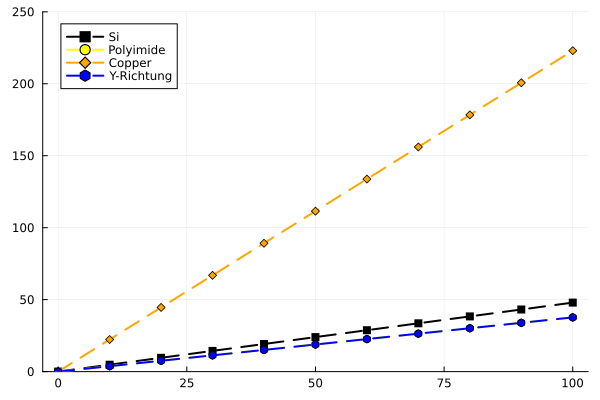

In [92]:

####### Thermalverhalten ##########

FigThermal2=plot()


## Materials

#Polyimide
Ep=3200
vp=0.34
alphap=55*10^(-6)
#Silicon
Esi=160000
vsi=0.253
alphasi=2.9*10^(-6)
#Copper
Eco=117000
vco=0.3
alphaco=16.5*10^(-6)

## Equations

## Dehnung 
e1_1,e2_1,e3_1=symbols("e1_1 e2_1 e3_1")
e1_2,e2_2,e3_2=symbols("e1_2 e2_2 e3_2")
e1_3,e2_3,e3_3=symbols("e1_3 e2_3 e3_3")

## Spannung
o1_1,o2_1,o3_1=symbols("o1_1 o2_1 o3_1")
o1_2,o2_2,o3_2=symbols("o1_2 o2_2 o3_2")
o1_3,o2_3,o3_3=symbols("o1_3 o2_3 o3_3")


## Layers

v1,v2,v3=vsi,vp,vco
E1,E2,E3=Esi,Ep,Eco
alpha1,alpha2,alpha3=alphasi,alphap,alphaco

## Geometrie

t1,t2,t3=0.5,0.01,0.04*0.58
l1,l2,l3=10,10,10
w1,w2,w3=5,5,5

## Load

deltaTRange=range(0,100,step=10) 


sigma1_max=[]
sigma2_max=[]
sigma3_max=[]
sigma_2=[]
for deltaT in deltaTRange
    #Constitutive law

    ## Richtung X
    eq1=e1_1-(1/E1)*(o1_1-v1*(o2_1-o3_1))-alpha1*deltaT
    eq2=e1_2-(1/E2)*(o1_2-v2*(o2_2-o3_2))-alpha2*deltaT
    eq3=e1_3-(1/E3)*(o1_3-v3*(o2_3-o3_3))-alpha3*deltaT

    ## Richtung Y
    eq4=e2_1-(1/E1)*(o2_1-v1*(o1_1-o3_1))-alpha1*deltaT
    eq5=e2_2-(1/E2)*(o2_2-v2*(o1_2-o3_2))-alpha2*deltaT
    eq6=e2_3-(1/E3)*(o2_3-v3*(o1_3-o3_3))-alpha3*deltaT


    ## Richtung Z
    eq7=e3_1-(1/E1)*(o3_1-v1*(o1_1-o2_1))-alpha1*deltaT
    eq8=e3_2-(1/E2)*(o3_2-v2*(o1_2-o2_2))-alpha2*deltaT
    eq9=e3_3-(1/E3)*(o3_3-v3*(o1_3-o2_3))-alpha3*deltaT


    #Kompatibilität

    ## Richtung X
    eq10=e1_1
    eq11=e1_2
    eq12=e1_3

    ## Richtung Y

    eq13=e2_1*t1+e2_2*t2+e2_3*t3
    eq14=o2_1-o2_2
    eq15=o2_2-o2_3

    ## Richtung Z

    eq16=e3_1
    eq17=e3_2
    eq18=e3_3

    ## solve
    sol=solve([eq1,eq2,eq3,
                eq4,eq5,eq6,
                eq7,eq8,eq9,
                eq10,eq11,eq12,
                eq13,eq14,eq15,
                eq16,eq17,eq18],
                [e1_1,e2_1,e3_1,
                e1_2, e2_2, e3_2,
                e1_3, e2_3, e3_3,
                o1_1, o2_1, o3_1,
                o1_2,o2_2,o3_2,
                o1_3,o2_3,o3_3])
    sol

    sigma1=minimum([sol[o1_1],sol[o2_1],sol[o3_1]]) # Layer 1
    sigma2=minimum([sol[o1_2],sol[o2_2],sol[o3_2]]) # Layer 2
    sigma3=minimum([sol[o1_3],sol[o2_3],sol[o3_3]]) # Layer 3

    push!(sigma1_max,abs(sigma1))
    push!(sigma2_max,abs(sigma2))
    push!(sigma3_max,abs(sigma3))
    push!(sigma_2,abs(sol[o2_1]))
end

sigma1_max


df_PICo=DataFrame(o2=sigma_2,o_subs=sigma1_max,o_coat=sigma2_max,o_metal=sigma3_max)

plot!(FigThermal2,deltaTRange,ylims=(0, 250), sigma1_max, label="Si", lw=2, linestyle=:dash, color=:black, marker=:square)
plot!(FigThermal2,deltaTRange,ylims=(0, 250), sigma2_max, label="Polyimide", lw=2, linestyle=:dash, color=:yellow, marker=:circle)
plot!(FigThermal2,deltaTRange,ylims=(0, 250), sigma3_max, label="Copper", lw=2, linestyle=:dash, color=:orange, marker=:diamond)
plot!(FigThermal2,deltaTRange,ylims=(0, 250), sigma_2, label="Y-Richtung", lw=2, linestyle=:dash, color=:blue, marker=:hexagon)


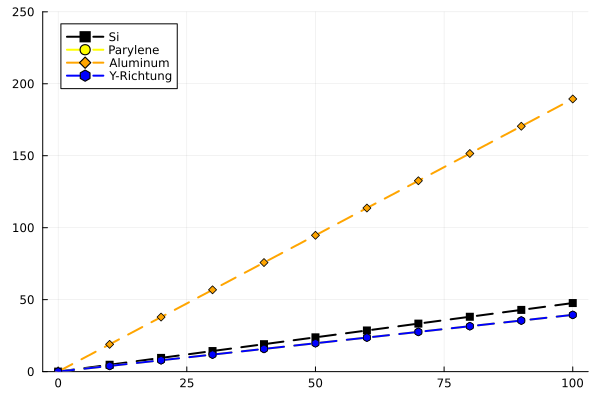

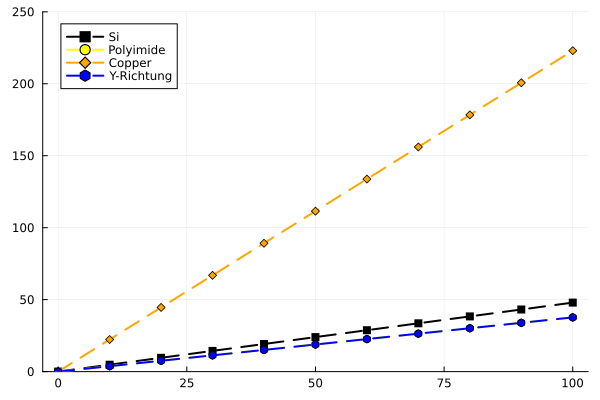

In [93]:
display(FigThermal)
display(FigThermal2)

In [87]:
display(df_PaAl[10,:])
display(df_PICo[10,:])

Row,o2,o_subs,o_coat,o_metal
,Any,Any,Any,Any
10,30.8367601436574,43.7002035355810,30.8367601436574,171.420770432174


Row,o2,o_subs,o_coat,o_metal
,Any,Any,Any,Any
10,33.3083682283637,43.2611925088541,33.3083682283637,200.801598781691


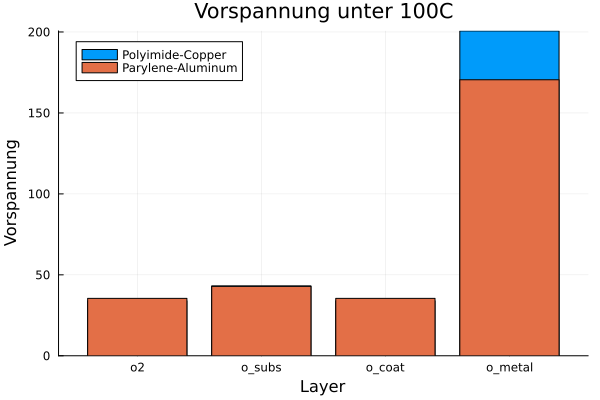

In [94]:
# Extract the column names and values
column_names = names(df_PaAl[10,:])



PA = vec([df_PaAl[10, i] for i in 1:ncol(df_PaAl)])

PI = vec([df_PICo[10, i] for i in 1:ncol(df_PICo)])


# Create the bar plot
bar(column_names, PI, label = "Polyimide-Copper", title = "Vorspannung unter 100C", xlabel = "Layer", ylabel = "Vorspannung", legend=true,bar_position = :dodge )
bar!(column_names, PA, label = "Parylene-Aluminum", title = "Vorspannung unter 100C", xlabel = "Layer", ylabel = "Vorspannung", legend=true)




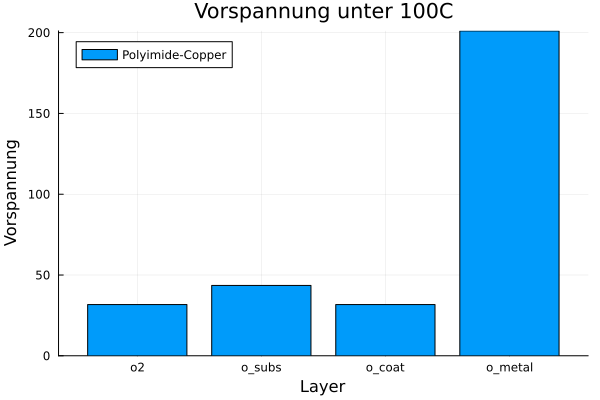

In [81]:
bar(column_names, PI, label = "Polyimide-Copper", title = "Vorspannung unter 100C", xlabel = "Layer", ylabel = "Vorspannung", legend=true,bar_position = :dodge )

# Oktober
